          PC1       PC2
0    0.321708 -0.351911
1    0.248324 -0.417809
2    0.258434 -0.426496
3    0.234022 -0.450655
4    0.282905 -0.381927
..        ...       ...
147 -0.597751 -0.767560
148 -0.258729 -0.645355
149 -0.120922 -0.574330
150 -0.010049 -0.509698
151 -0.008677 -0.498764

[152 rows x 2 columns]


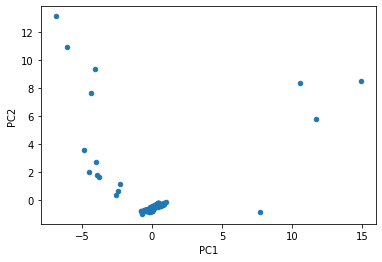

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterC_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


,PC1,PC2,Cluster
0,0.321708,-0.351911,1
1,0.248324,-0.417809,1
2,0.258434,-0.426496,1
3,0.234022,-0.450655,1
4,0.282905,-0.381927,1
...,...,...,...
147,-0.597751,-0.767560,1
148,-0.258729,-0.645355,1
149,-0.120922,-0.574330,1
150,-0.010049,-0.509698,1


In [5]:
km.cluster_centers_

array([[ 0.09074897, -0.56263364],
       [12.41288063,  7.52627537],
       [-3.54328752,  1.69784388],
       [-5.33123752, 10.22980786]])

No handles with labels found to put in legend.


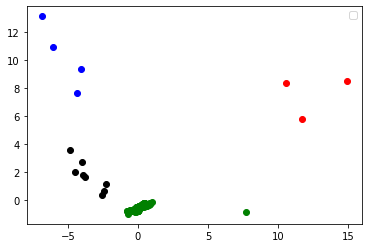

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
df4 = dataA_feature[dataA_feature.Cluster==4]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.scatter(df4['PC1'],df4['PC2'],color='blue')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[1466.82711749878,
 821.925517356269,
 270.1578278078539,
 134.3726038504405,
 75.8181465307847,
 58.07227897891474,
 41.396127641393626,
 30.609709263059123,
 19.815143130158667]

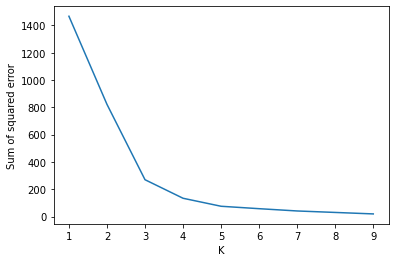

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)